In [ ]:
## Code Cell 1

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Code Cell 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
## Code Cell 3

file_path = '/content/drive/MyDrive/mlul assignment csv file/Champo Carpets V1.csv'
data = pd.read_csv(file_path)
data.head()

,OrderiD,Item_Id,CustomerCode,CountryName,customer_country,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName
0,1,5,H-1,USA,H-1USA,6,128.25,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC
1,1,26,H-1,USA,H-1USA,6,117.00,702.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC
2,1,17,H-1,USA,H-1USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC
3,1,496,H-1,USA,H-1USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC
4,1,30,H-1,USA,H-1USA,5,117.00,585.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC


## Markdown Cell 4

# Exploratory Data Analysys

In [ ]:
## Code Cell 5

desc_stats = data.describe()
print(desc_stats)

            OrderiD       Item_Id   QtyRequired     TotalArea         Amount
count  13135.000000  13135.000000  13135.000000  13135.000000   13135.000000
mean    3075.336962  14528.683746     44.460601     44.731370    2392.040164
std     2107.731646  13183.139544    228.749535     50.099597   16832.091080
min        1.000000      1.000000      1.000000      0.040000       0.000000
25%     1219.500000   3023.000000      3.000000      5.800000     163.200000
50%     2934.000000   8631.000000      8.000000     24.000000     590.625000
75%     4630.000000  26713.000000     20.000000     80.000000    1540.000000
max     7548.000000  46701.000000   6400.000000   1024.000000  599719.680000


In [ ]:
## Code Cell 6

missing_values = data.isnull().sum()

print(missing_values)

OrderiD             0
Item_Id             0
CustomerCode        0
CountryName         0
customer_country    0
QtyRequired         0
TotalArea           0
Amount              0
ITEM_NAME           0
QualityName         0
DesignName          0
ColorName           0
ShapeName           0
dtype: int64


In [ ]:
## Code Cell 7

unique_customers = data['CustomerCode'].nunique()
unique_items = data['Item_Id'].nunique()
unique_countries = data['CountryName'].nunique()
unique_qualities = data['QualityName'].nunique()

print('Total no. of customers=',unique_customers)
print('Total no. of items=',unique_items)
print('no of countries=',unique_countries)
print('no of unique qualities=',unique_qualities)

Total no. of customers= 45
Total no. of items= 5875
no of countries= 14
no of unique qualities= 184


In [ ]:
## Code Cell 8

# Top customers by order frequency
top_customers = data['CustomerCode'].value_counts().sort_values(ascending=False)
print('top 10 customers by order frequency:-',
      top_customers)

top 10 customers by order frequency:- M-1     2380
P-5     1862
A-9     1173
JL      1073
C-1     1058
TGT      609
T-2      551
H-2      476
I-2      436
T-5      418
M-2      282
E-2      273
RC       255
C-2      232
CC       194
H-1      193
PD       190
N-1      184
S-2      168
K-2      160
PC       152
C-3       87
B-4       75
B-3       72
T-4       57
G-1       56
V-1       53
P-4       50
B-2       47
DR        46
F-1       42
T-6       40
A-11      40
S-3       30
L-3       28
A-6       25
L-2       22
L-5       14
R-4       10
CTS        8
G-4        7
L-4        2
K-3        2
T-9        2
F-6        1
Name: CustomerCode, dtype: int64


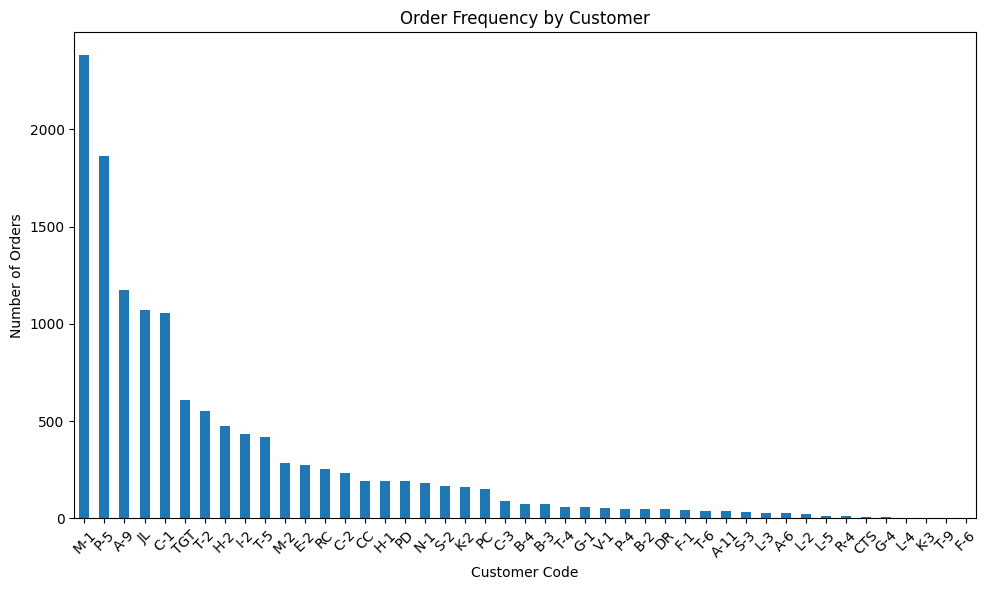

In [ ]:
## Code Cell 9

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title('Order Frequency by Customer')
plt.xlabel('Customer Code')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
## Code Cell 10

# Top products by order frequency
top_products = data['Item_Id'].value_counts().sort_values(ascending=False)
print('top 10 products by order frequency:-',
      top_products)

top 10 products by order frequency:- 2276     29
3539     28
3981     27
5890     26
2280     26
         ..
43783     1
43792     1
43785     1
43786     1
46679     1
Name: Item_Id, Length: 5875, dtype: int64


In [ ]:
## Code Cell 11

# Product popularity (by quantity required)
product_popularity = data.groupby('ITEM_NAME')['QtyRequired'].sum().sort_values(ascending=False)
print('Product Popularity by demand:-',
      product_popularity)

Product Popularity by demand:- ITEM_NAME
DURRY                  319635
HAND TUFTED            164288
HANDWOVEN               39046
DOUBLE BACK             18356
KNOTTED                 16459
POWER LOOM JACQUARD      9753
HANDLOOM                 8349
JACQUARD                 4024
TABLE TUFTED             3564
GUN TUFTED                366
-                         118
INDO-TIBBETAN              32
Name: QtyRequired, dtype: int64


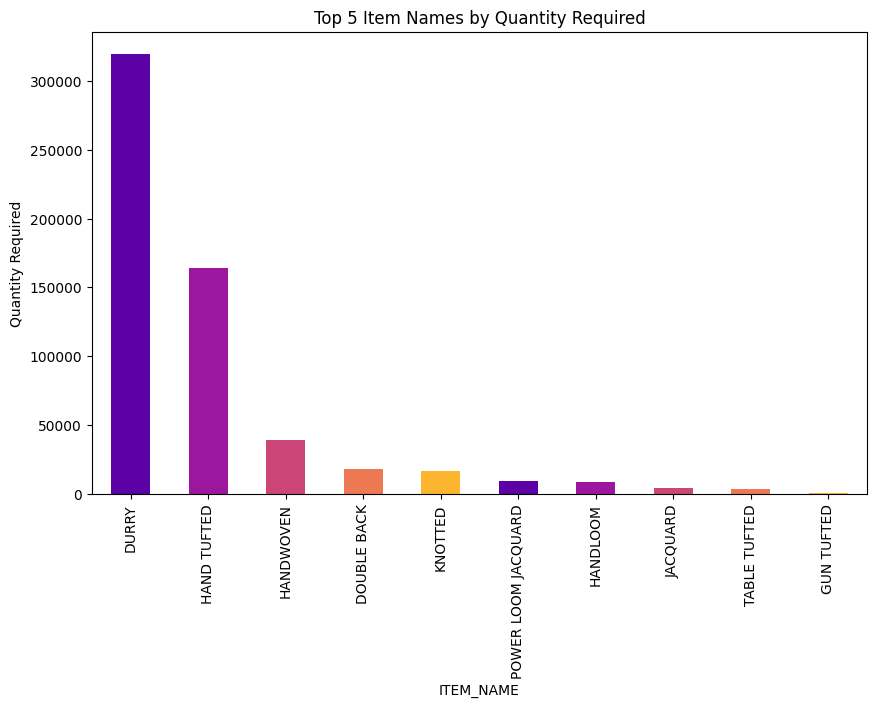

In [ ]:
## Code Cell 12

# Top 10 Item Names by Quantity Required
top_items = data.groupby('ITEM_NAME')['QtyRequired'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color=sns.color_palette("plasma", 5))
plt.title('Top 5 Item Names by Quantity Required')
plt.ylabel('Quantity Required')
plt.show()

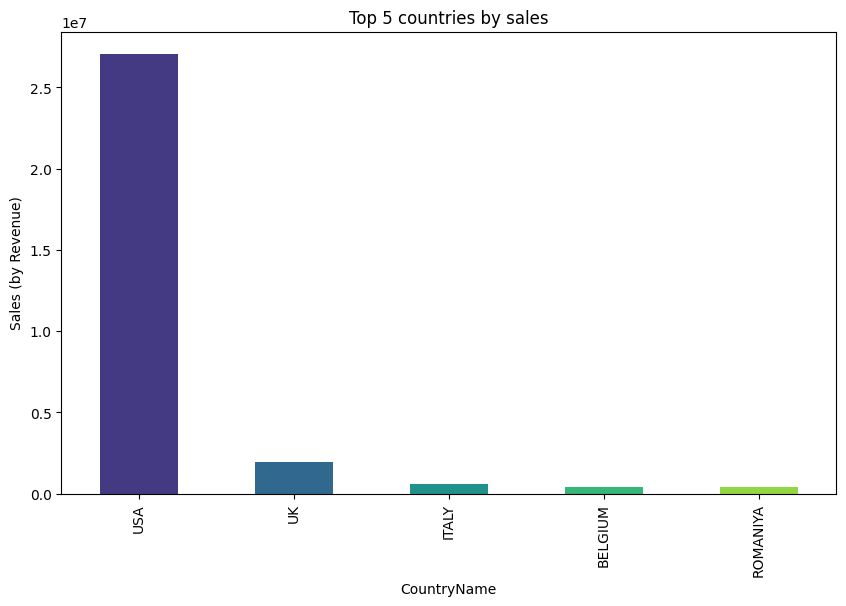

In [ ]:
## Code Cell 13

# Top 5 countries by sales
top_countries = data.groupby('CountryName')['Amount'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color=sns.color_palette("viridis", 5))
plt.title('Top 5 countries by sales')
plt.ylabel('Sales (by Revenue)')
plt.show()

In [ ]:
## Code Cell 14

# 3. Sales distribution across different countries
country_sales = data.groupby('CountryName')['Amount'].sum().sort_values(ascending=False)
print('Sales distribution across different countries:-',
      country_sales)

Sales distribution across different countries:- CountryName
USA             2.708287e+07
UK              1.965411e+06
ITALY           5.630988e+05
BELGIUM         4.267914e+05
ROMANIYA        4.266260e+05
AUSTRALIA       3.569389e+05
INDIA           1.475740e+05
SOUTH AFRICA    1.304580e+05
CANADA          1.167783e+05
BRAZIL          5.987727e+04
LEBENON         5.674273e+04
UAE             4.423400e+04
CHINA           2.491996e+04
ISRAEL          1.712888e+04
Name: Amount, dtype: float64


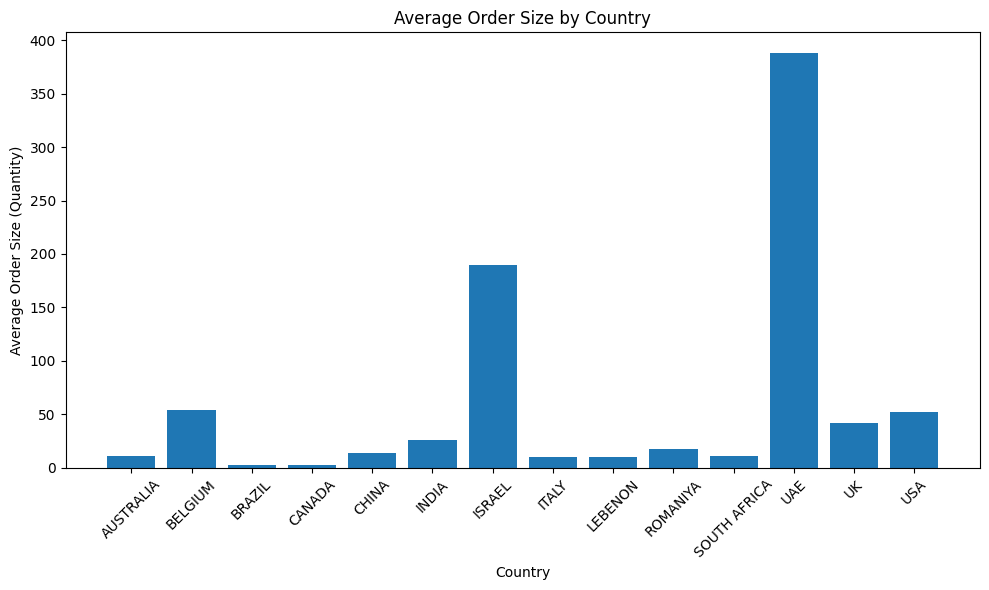

In [ ]:
## Code Cell 15

# Calculating Average Order Size by Country
average_order_size_by_country = data.groupby('CountryName')['QtyRequired'].mean().reset_index()

# Plotting Average Order Size by Country
plt.figure(figsize=(10, 6))
plt.bar(average_order_size_by_country['CountryName'], average_order_size_by_country['QtyRequired'])
plt.title('Average Order Size by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Size (Quantity)')
plt.xticks(rotation=45)
plt.tight_layout()

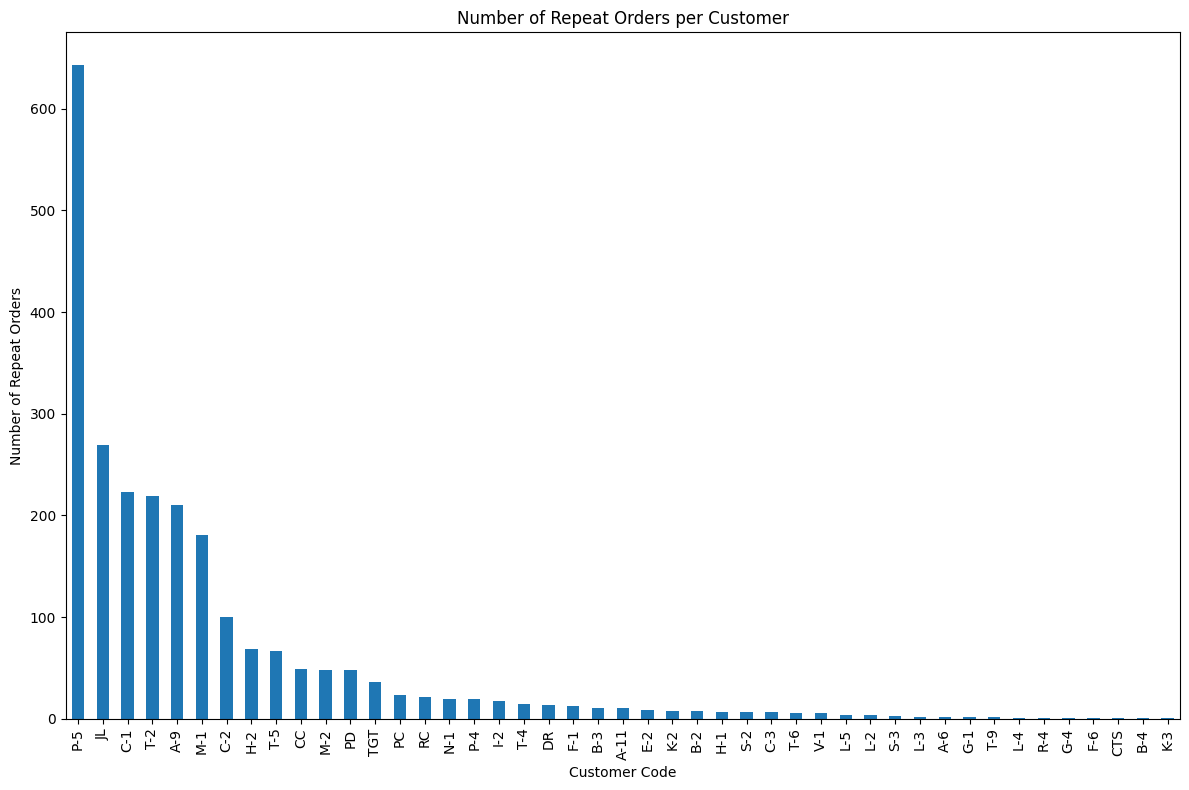

In [ ]:
## Code Cell 16

# Counting the number of unique orders for each customer
repeat_orders_per_customer = data.groupby('CustomerCode')['OrderiD'].nunique()

# Sorting the customers by the number of repeat orders
repeat_orders_per_customer = repeat_orders_per_customer.sort_values(ascending=False)

# Plotting the number of repeat orders for each customer
plt.figure(figsize=(12, 8))
repeat_orders_per_customer.plot(kind='bar')
plt.title('Number of Repeat Orders per Customer')
plt.xlabel('Customer Code')
plt.ylabel('Number of Repeat Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Markdown Cell 17

# K- Means Clustering

In [ ]:
## Code Cell 18

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
## Code Cell 19

customer_data = data.groupby('CustomerCode').agg(Frequency=('OrderiD', 'nunique'), Monetary=('Amount', 'sum')).reset_index()


In [ ]:
## Code Cell 20

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Frequency', 'Monetary']])

In [ ]:
## Code Cell 21

# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

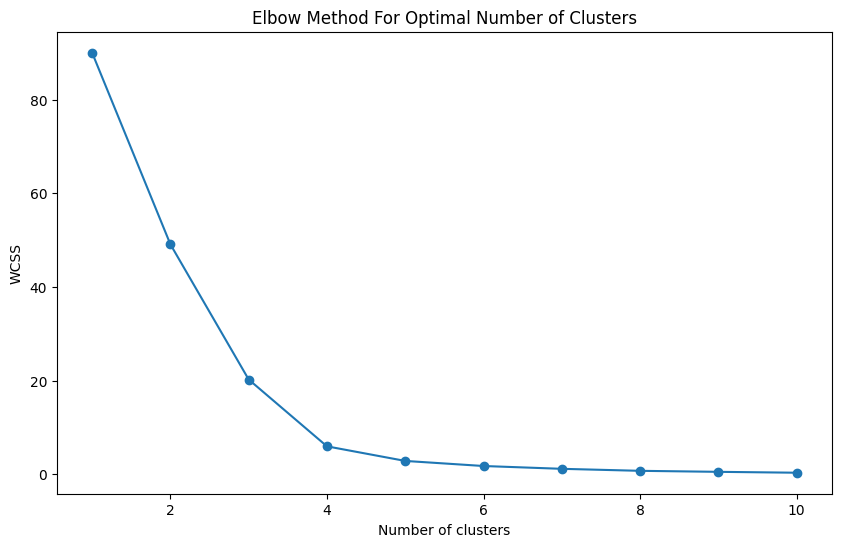

In [ ]:
## Code Cell 22

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
## Code Cell 23

kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
## Code Cell 24

cluster_centers = kmeans.cluster_centers_
cluster_counts = customer_data['Cluster'].value_counts()

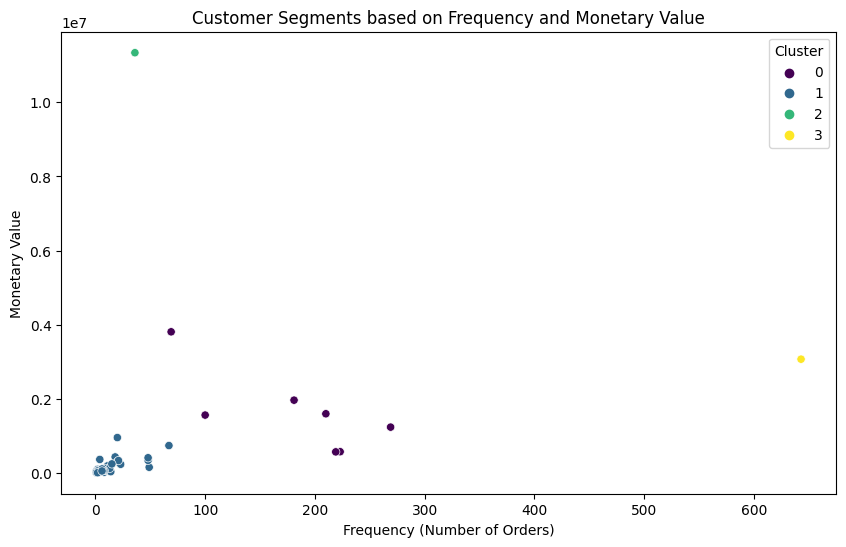

(array([[ 1.14506856,  0.51021865],
        [-0.36477383, -0.30125976],
        [-0.15748208,  5.94982949],
        [ 5.27386008,  1.32399125]]),
 1    36
 0     7
 3     1
 2     1
 Name: Cluster, dtype: int64)

In [ ]:
## Code Cell 25

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Frequency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Frequency and Monetary Value')
plt.xlabel('Frequency (Number of Orders)')
plt.ylabel('Monetary Value')
plt.show()

(cluster_centers, cluster_counts)


In [ ]:
## Code Cell 26

kmeans_clusters = kmeans.fit_predict(scaled_data)
kmeans_silhouette = silhouette_score(scaled_data, kmeans_clusters)
print('K-Means clustreing silhouette score =',kmeans_silhouette)

K-Means clustreing silhouette score = 0.7740680398369806


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
## Code Cell 27

cluster_analysis_kmeans = customer_data.groupby('Cluster').agg(
    Avg_Frequency=('Frequency', 'mean'),
    Avg_Monetary=('Monetary', 'mean')
).reset_index()

cluster_analysis_kmeans

,Cluster,Avg_Frequency,Avg_Monetary
0,0,181.571429,1.610871e+06
1,1,12.833333,1.593272e+05
2,2,36.000000,1.134105e+07
3,3,643.000000,3.066518e+06


## Markdown Cell 28

#Agglomerative Clustering

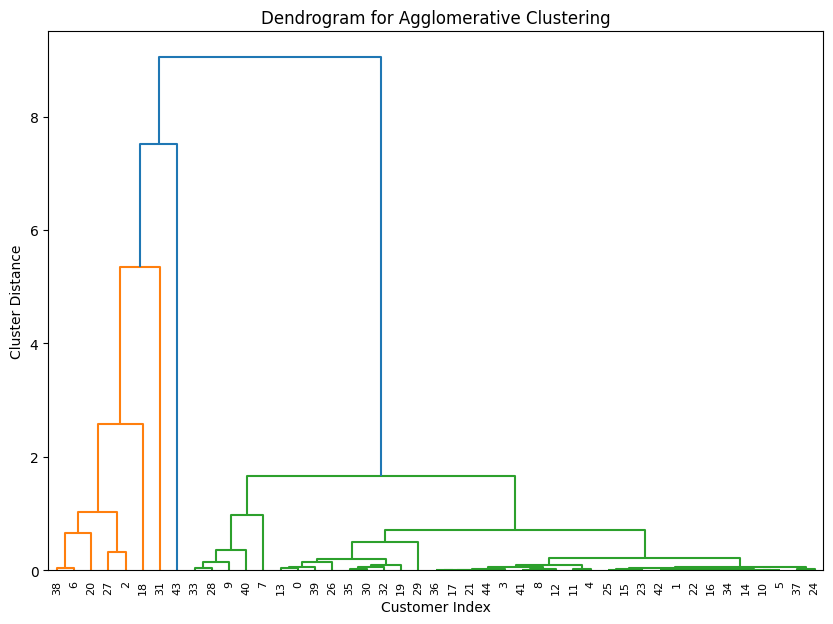

In [ ]:
## Code Cell 29

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Cluster Distance')
plt.show()

In [ ]:
## Code Cell 30

agglo = AgglomerativeClustering(n_clusters=4)
agglo_clusters = agglo.fit_predict(scaled_data)
agglo_silhouette = silhouette_score(scaled_data, agglo_clusters)
print('Agglomerative clustreing silhouette score =',agglo_silhouette)

Agglomerative clustreing silhouette score = 0.7725589466076822


In [ ]:
## Code Cell 31

n_clusters = 4
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean')
customer_data['Cluster'] = clustering.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Markdown Cell 32

# Cluster Analysys

In [ ]:
## Code Cell 33

cluster_analysis = customer_data.groupby('Cluster').agg(
    Average_Frequency=('Frequency', 'mean'),
    MeanMonetaryValue=('Monetary', 'mean')
).reset_index()
cluster_analysis['Count'] = customer_data['Cluster'].value_counts()
cluster_analysis.sort_values(by='MeanMonetaryValue', ascending=False, inplace=True)
cluster_analysis['Cluster'] = np.arange(len(cluster_analysis))
print(cluster_analysis)

   Cluster  Average_Frequency  MeanMonetaryValue  Count
2        0          36.000000       1.134105e+07      1
3        1         643.000000       3.066518e+06      1
0        2         195.166667       1.619829e+06      6
1        3          15.189189       1.971055e+05     37


In [ ]:
## Code Cell 34

pip install hdbscan

In [ ]:
## Code Cell 35

import hdbscan
import plotly.express as px

df = customer_data

# 'Frequency' and 'Monetary' are the columns we want to use for clustering
X = df[['Frequency', 'Monetary']]

# Initialize HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)

# Fit the data and obtain clusters
labels = clusterer.fit_predict(X)

# Add cluster labels to the original DataFrame
df['Cluster'] = labels

# Filter to keep only 4 clusters
#df = df[df['Cluster'].isin(range(4))]

# Create an interactive scatter plot using plotly
fig = px.scatter(df, x='Frequency', y='Monetary', color='Cluster', hover_data=['CustomerCode'],
                 title='HDBSCAN Clustering', labels={'Cluster': 'Cluster'})

# Show the plot
fig.show()

# Display the number of customers in each cluster
cluster_counts = df['Cluster'].value_counts().reset_index().rename(columns={'index': 'Cluster', 'Cluster': 'CustomerCount'})
print(cluster_counts)


   Cluster  CustomerCount
0       -1             15
1        5              5
2        2              5
3        1              5
4        3              4
5        6              4
6        4              3
7        7              2
8        0              2


In [ ]:
## Code Cell 36

# Feature 1: High Value vs Low Value Items
# Assuming items with an amount above the median are 'High Value'
median_amount = data['Amount'].median()
data['Item_Value_Type'] = data['Amount'].apply(lambda x: 'High Value' if x > median_amount else 'Low Value')

# Feature 2: Diversity of Items
# Counting the number of unique items bought by each customer
diversity_of_items = data.groupby('CustomerCode')['Item_Id'].nunique().reset_index()
diversity_of_items.rename(columns={'Item_Id': 'Unique_Items'}, inplace=True)

# Merging these features with the original customer_data
enhanced_customer_data = customer_data.merge(diversity_of_items, on='CustomerCode', how='left')

# Adding a column for the count of High Value items purchased by each customer
high_value_counts = data[data['Item_Value_Type'] == 'High Value'].groupby('CustomerCode').size().reset_index(name='High_Value_Count')
enhanced_customer_data = enhanced_customer_data.merge(high_value_counts, on='CustomerCode', how='left').fillna(0)

# Displaying the first few rows of the enhanced data
enhanced_customer_data.head()


,CustomerCode,Frequency,Monetary,Cluster,Unique_Items,High_Value_Count
0,A-11,11,1.854041e+05,-1,23,13.0
1,A-6,2,6.247460e+03,3,25,1.0
2,A-9,210,1.592080e+06,-1,504,621.0
3,B-2,8,1.481116e+04,6,44,4.0
4,B-3,11,5.862686e+04,5,72,40.0


In [ ]:
## Code Cell 37

from sklearn.preprocessing import MinMaxScaler

# Preparing data for clustering
clustering_features = ['Frequency', 'Monetary', 'Unique_Items', 'High_Value_Count']
clustering_data = enhanced_customer_data[clustering_features]

# Scaling the data - using MinMaxScaler as it works well with Agglomerative Clustering
scaler = MinMaxScaler()
scaled_clustering_data = scaler.fit_transform(clustering_data)

# Applying Agglomerative Clustering
# Assuming 4 clusters initially, similar to the previous approach for comparison
agglo_cluster = AgglomerativeClustering(n_clusters=4)
enhanced_customer_data['Enhanced_Cluster'] = agglo_cluster.fit_predict(scaled_clustering_data)

# Displaying the first few rows with enhanced cluster labels
enhanced_customer_data.head()


,CustomerCode,Frequency,Monetary,Cluster,Unique_Items,High_Value_Count,Enhanced_Cluster
0,A-11,11,1.854041e+05,-1,23,13.0,1
1,A-6,2,6.247460e+03,3,25,1.0,1
2,A-9,210,1.592080e+06,-1,504,621.0,2
3,B-2,8,1.481116e+04,6,44,4.0,1
4,B-3,11,5.862686e+04,5,72,40.0,1


In [ ]:
## Code Cell 38

# Analyzing the enhanced clusters
enhanced_cluster_analysis = enhanced_customer_data.groupby('Enhanced_Cluster').agg(
    Average_Frequency=('Frequency', 'mean'),
    Average_Monetary=('Monetary', 'mean'),
    Average_Unique_Items=('Unique_Items', 'mean'),
    Average_High_Value_Count=('High_Value_Count', 'mean')
).reset_index()

enhanced_cluster_analysis


,Enhanced_Cluster,Average_Frequency,Average_Monetary,Average_Unique_Items,Average_High_Value_Count
0,0,412.000000,2.513156e+06,678.500000,966.500000
1,1,11.088235,1.345683e+05,64.529412,36.823529
2,2,146.875000,1.309595e+06,294.625000,379.875000
3,3,36.000000,1.134105e+07,74.000000,343.000000


## Markdown Cell 39

The enhanced customer data now includes new features:

1. **Unique_Items**: The number of unique items each customer has purchased, indicating the diversity of their orders.
2. **High_Value_Count**: The count of 'High Value' items purchased by each customer.

With these new features, we will reapply clustering. Since we're exploring more complex customer behaviors, I'll use Agglomerative Clustering this time. It's a hierarchical clustering method that can capture more nuanced relationships between data points.

The enhanced customer data has been clustered using Agglomerative Clustering, and each customer is now assigned to one of four new clusters based on the additional features.

The analysis of the enhanced clusters reveals distinct customer segments based on their purchasing behavior:

1. **Cluster 0 - "Bulk Elite Buyers"**: These customers have a high average frequency of orders (412), a high monetary value (around 2.51 million), and a very high number of unique items purchased (678.5 on average), indicating diverse and frequent high-value purchases.

2. **Cluster 1 - "Occasional Niche Shoppers"**: This segment shows a low average frequency (11.09) with a moderate monetary value (around 134,568) and fewer unique items (64.53 on average). They are likely occasional shoppers focusing on specific items.

3. **Cluster 2 - "Frequent Diverse Shoppers"**: Customers here show a relatively high average frequency (146.88) and monetary value (around 1.31 million), with a significant diversity in their purchases (294.63 unique items on average).

4. **Cluster 3 - "Ultra High-Value Clients"**: This small, distinct group has the highest monetary spending (around 11.34 million), a considerable frequency (36), and a moderate level of item diversity (74 unique items), indicating very high-value purchases.